In [1]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as pyplot
import pandas as pd
%matplotlib inline

In [2]:
sp_mat = sp.load_npz('chr16_82000001_85000001.npz')

In [3]:
df = pd.read_csv('chr16_82000001_85000001', delimiter='\t')

In [4]:
df

,rsid,chromosome,position,allele1,allele2
0,rs4888201,16,82000020,A,G
1,16:82000233_CA_C,16,82000233,CA,C
2,rs188826316,16,82000302,C,A
3,rs28376393,16,82000353,G,C
4,rs28494471,16,82000380,T,C
...,...,...,...,...,...
35498,rs562017540,16,84999704,C,CACAT
35499,16:84999723_TCA_T,16,84999723,TCA,T
35500,rs76369074,16,84999735,A,C
35501,rs766021419,16,84999737,TCA,T


In [5]:
base_position = 82000001

In [6]:
max_position = 85000001

In [7]:
df['adjusted_position'] = df.position - base_position

In [8]:
df

,rsid,chromosome,position,allele1,allele2,adjusted_position
0,rs4888201,16,82000020,A,G,19
1,16:82000233_CA_C,16,82000233,CA,C,232
2,rs188826316,16,82000302,C,A,301
3,rs28376393,16,82000353,G,C,352
4,rs28494471,16,82000380,T,C,379
...,...,...,...,...,...,...
35498,rs562017540,16,84999704,C,CACAT,2999703
35499,16:84999723_TCA_T,16,84999723,TCA,T,2999722
35500,rs76369074,16,84999735,A,C,2999734
35501,rs766021419,16,84999737,TCA,T,2999736


In [66]:
m = sp_mat.tocsr()

In [14]:
len(m.indptr)

35504

In [13]:
len(m.indices)

630249218

In [15]:
m.shape

(35503, 35503)

In [67]:
def insert_rows(matrix, index, n):
    assert type(matrix) == sp._csr.csr_matrix
    
    num_rows, num_cols = matrix.shape
    matrix._shape = (num_rows + n, num_cols)
    matrix.indptr = np.insert(matrix.indptr, index, [matrix.indptr[index]] * n)

def insert_columns(matrix, index, n):
    assert type(matrix) == sp._csc.csc_matrix

    num_rows, num_cols = matrix.shape
    matrix._shape = (num_rows, num_cols + n)
    matrix.indptr = np.insert(matrix.indptr, index, [matrix.indptr[index]] * n)




In [62]:
x = m[:10, :10]

In [63]:
pd.DataFrame(x.todense())

,0,1,2,3,4,5,6,7,8,9
0,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.950139,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,-0.234925,-0.229400,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.105999,0.108776,-0.024126,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.098410,0.101514,-0.025598,0.934986,0.500000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.007848,-0.009516,-0.002619,0.003308,0.003078,0.500000,0.000000,0.000000,0.000000,0.0
6,0.083633,0.080969,-0.103696,0.024018,0.025484,0.002464,0.500000,0.000000,0.000000,0.0
7,0.571500,0.564472,-0.175417,-0.361301,-0.321994,-0.014468,0.154037,0.500000,0.000000,0.0
8,0.011218,-0.006200,-0.002657,-0.001076,-0.003215,0.110411,0.003559,-0.034959,0.500000,0.0
9,0.100187,0.100092,-0.022820,-0.050766,-0.054431,0.000784,0.023098,-0.317818,0.001369,0.5


In [64]:
insert_rows(x, 0, 5)
x = x.tocsc()
insert_columns(x, 0, 5)

In [68]:
prev_pos = 0

for i, pos_i in enumerate(df.adjusted_position):
    jump = pos_i - prev_pos
    if i % 100 == 0:
        print(f'running row {i}')
    insert_rows(m, i + prev_pos, jump)
        

running row 0
running row 100
running row 200
running row 300
running row 400
running row 500
running row 600
running row 700
running row 800
running row 900
running row 1000
running row 1100
running row 1200
running row 1300
running row 1400
running row 1500
running row 1600
running row 1700
running row 1800
running row 1900
running row 2000
running row 2100
running row 2200
running row 2300


KeyboardInterrupt: 

In [ ]:
full = sp.lil_matrix((max_position - base_position, max_position - base_position))

In [ ]:
full[19, 19] = m[0, 0]

In [ ]:
full

In [ ]:
for i, pos_i in enumerate(df.adjusted_position):
    if i % 100 == 0:
        print(f'finished row {i}')
    for j, pos_j in enumerate(df.adjusted_position):
        if j <= i:
            full[pos_i, pos_j] = m[i,j]

In [69]:
import numpy as np
import pandas as pd
import scipy.sparse as sparse
def load_ld_npz(ld_prefix):
    
    #load the SNPs metadata
    gz_file = '%s.gz'%(ld_prefix)
    df_ld_snps = pd.read_table(gz_file, sep='\s+')
    df_ld_snps.rename(columns={'rsid':'SNP', 'chromosome':'CHR', 'position':'BP', 'allele1':'A1', 'allele2':'A2'}, inplace=True, errors='ignore')
    assert 'SNP' in df_ld_snps.columns
    assert 'CHR' in df_ld_snps.columns
    assert 'BP' in df_ld_snps.columns
    assert 'A1' in df_ld_snps.columns
    assert 'A2' in df_ld_snps.columns
    df_ld_snps.index = df_ld_snps['CHR'].astype(str) + '.' + df_ld_snps['BP'].astype(str) + '.' + df_ld_snps['A1'] + '.' + df_ld_snps['A2']
        
    #load the LD matrix
    npz_file = '%s.npz'%(ld_prefix)
    try: 
        R = sparse.load_npz(npz_file).toarray()
        R += R.T
    except ValueError:
        raise IOError('Corrupt file: %s'%(npz_file))

    #create df_R and return it
    df_R = pd.DataFrame(R, index=df_ld_snps.index, columns=df_ld_snps.index)
    return df_R, df_ld_snps

In [74]:
x=load_ld_npz('chr4_191000001_194000001')

In [75]:
r, ld_snps = x

In [78]:
r

,4.191001966.T.C,4.191003220.C.G,4.191014647.A.G,4.191014874.G.T,4.191014875.A.T,4.191015170.G.GA,4.191015207.A.G,4.191015335.A.G,4.191016128.A.C,4.191017662.T.G,...,4.191041862.A.C,4.191041909.G.T,4.191042218.C.A,4.191043447.G.A,4.191043517.C.A,4.191043546.G.A,4.191043669.T.G,4.191043759.T.TA,4.191043877.G.A,4.191043881.T.G
4.191001966.T.C,1.000000,-0.008269,-0.017657,-0.015954,-0.015954,-0.003988,0.019517,-0.013758,-0.007548,-0.006251,...,-0.059591,0.047995,0.046269,-0.009095,0.047335,-0.007746,-0.033822,0.065952,-0.010522,-0.009471
4.191003220.C.G,-0.008269,1.000000,-0.045330,-0.020845,-0.020845,-0.061824,0.012222,-0.041993,-0.008559,-0.007385,...,-0.008324,-0.014690,0.032119,0.438529,0.030446,-0.008497,0.037343,0.064663,-0.029386,-0.010041
4.191014647.A.G,-0.017657,-0.045330,1.000000,0.285993,0.285993,0.232141,0.077774,0.304496,-0.027486,-0.023654,...,-0.148733,-0.031930,-0.169516,-0.038370,-0.171368,0.066728,0.013304,-0.087234,0.009829,-0.011174
4.191014874.G.T,-0.015954,-0.020845,0.285993,1.000000,0.999592,0.072677,-0.012695,0.154822,-0.014193,-0.021150,...,-0.078826,0.100299,-0.098527,-0.031812,-0.098913,-0.013601,-0.033727,-0.109808,-0.032797,-0.028086
4.191014875.A.T,-0.015954,-0.020845,0.285993,0.999592,1.000000,0.072677,-0.012695,0.154822,-0.014193,-0.021150,...,-0.078826,0.100299,-0.098527,-0.031812,-0.098913,-0.013601,-0.033727,-0.109808,-0.032797,-0.028086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.191043546.G.A,-0.007746,-0.008497,0.066728,-0.013601,-0.013601,0.045099,0.017181,-0.007736,-0.004228,-0.003931,...,-0.035469,-0.007499,0.043496,-0.009234,0.040626,1.000000,-0.019614,-0.060419,0.047088,-0.008108
4.191043669.T.G,-0.033822,0.037343,0.013304,-0.033727,-0.033727,0.052031,-0.062463,-0.004229,-0.022619,-0.015537,...,0.050912,-0.012824,-0.035597,0.065499,-0.031743,-0.019614,1.000000,0.087214,-0.038089,0.058208
4.191043759.T.TA,0.065952,0.064663,-0.087234,-0.109808,-0.109808,-0.021616,-0.047935,-0.059905,0.027980,0.034211,...,0.033262,-0.045596,0.030741,0.036414,0.032722,-0.060419,0.087214,1.000000,-0.009359,0.026779
4.191043877.G.A,-0.010522,-0.029386,0.009829,-0.032797,-0.032797,0.020639,0.060116,-0.032816,0.028738,0.053215,...,0.009522,-0.029198,0.015835,0.023785,0.014498,0.047088,-0.038089,-0.009359,1.000000,0.033808


In [82]:
y  = load_ld_npz('chr16_82000001_85000001')

In [83]:
large = y[0]

In [84]:
large

,16.82000020.A.G,16.82000233.CA.C,16.82000302.C.A,16.82000353.G.C,16.82000380.T.C,16.82000540.C.A,16.82000573.GTTTTTTTTTTTTTTTTTT.G,16.82000618.A.C,16.82000630.A.C,16.82000643.A.T,...,16.84999648.C.T,16.84999649.GCACA.G,16.84999666.C.G,16.84999676.C.T,16.84999701.ACGCACAATCG.A,16.84999704.C.CACAT,16.84999723.TCA.T,16.84999735.A.C,16.84999737.TCA.T,16.84999969.C.T
16.82000020.A.G,1.000000,0.950139,-0.234925,0.105999,0.098410,0.007848,0.083633,0.571500,0.011218,0.100187,...,-0.000940,0.005127,-0.000433,-0.001837,0.001704,0.001434,0.000076,0.001815,0.001815,-0.000796
16.82000233.CA.C,0.950139,1.000000,-0.229400,0.108776,0.101514,-0.009516,0.080969,0.564472,-0.006200,0.100092,...,-0.000836,0.005055,-0.000163,-0.001223,0.002299,0.002019,-0.000380,0.001229,0.001230,-0.001351
16.82000302.C.A,-0.234925,-0.229400,1.000000,-0.024126,-0.025598,-0.002619,-0.103696,-0.175417,-0.002657,-0.022820,...,-0.000302,0.000405,-0.002620,-0.000781,0.000320,-0.001399,-0.004036,-0.000073,-0.000071,-0.000397
16.82000353.G.C,0.105999,0.108776,-0.024126,1.000000,0.934986,0.003308,0.024018,-0.361301,-0.001076,-0.050766,...,-0.004335,0.005019,-0.000050,0.000354,-0.000394,0.002256,0.000545,-0.002024,-0.002025,-0.000976
16.82000380.T.C,0.098410,0.101514,-0.025598,0.934986,1.000000,0.003078,0.025484,-0.321994,-0.003215,-0.054431,...,-0.003346,0.007491,0.000559,-0.001567,0.000212,0.002621,-0.000334,-0.000753,-0.000753,-0.001141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16.84999704.C.CACAT,0.001434,0.002019,-0.001399,0.002256,0.002621,0.002003,-0.002102,-0.000257,0.001158,-0.001481,...,0.338843,-0.020403,0.026693,-0.075899,0.819490,1.000000,-0.027975,0.399805,0.399804,0.165400
16.84999723.TCA.T,0.000076,-0.000380,-0.004036,0.000545,-0.000334,0.007646,0.003202,-0.000544,0.003892,0.001956,...,-0.008342,-0.003526,-0.000081,-0.014098,-0.024111,-0.027975,1.000000,-0.000763,-0.000765,-0.005001
16.84999735.A.C,0.001815,0.001229,-0.000073,-0.002024,-0.000753,0.000370,-0.001953,0.001732,0.001482,-0.000157,...,0.153962,-0.009505,0.029125,-0.191251,0.378115,0.399805,-0.000763,1.000000,0.999764,0.069316
16.84999737.TCA.T,0.001815,0.001230,-0.000071,-0.002025,-0.000753,0.000371,-0.001952,0.001732,0.001483,-0.000156,...,0.153965,-0.009507,0.029122,-0.191255,0.378113,0.399804,-0.000765,0.999764,1.000000,0.069315


In [85]:
large.min().min()

-1.0

In [86]:
large.max().max()

1.0

In [87]:
cohort_size = 318000
threshold = 1/cohort_size

In [92]:
(np.abs(large.iloc[0]) > threshold).sum()

35475

In [94]:
thresh = large.apply(lambda x: (np.abs(x) > threshold).sum())

In [95]:
thresh

16.82000020.A.G        35475
16.82000233.CA.C       35475
16.82000302.C.A        35479
16.82000353.G.C        35478
16.82000380.T.C        35484
                       ...  
16.84999704.C.CACAT    35469
16.84999723.TCA.T      35468
16.84999735.A.C        35474
16.84999737.TCA.T      35476
16.84999969.C.T        35470
Length: 35503, dtype: int64

In [97]:
thresh.sum() / (35503**2)

0.999323266137991

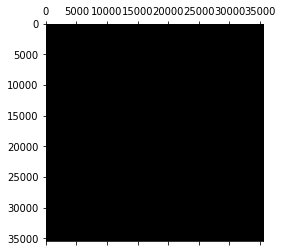

In [98]:
pyplot.spy(large)

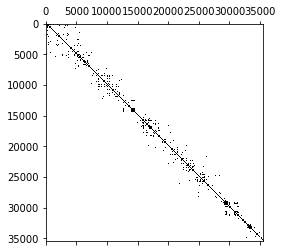

In [99]:
pyplot.spy(large, precision=0.1)

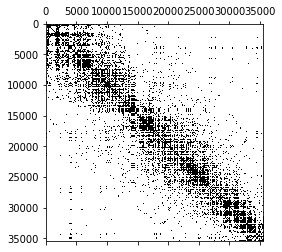

In [100]:
pyplot.spy(large, precision=0.01)

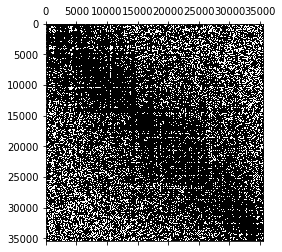

In [101]:
pyplot.spy(large, precision=0.001)

KeyboardInterrupt: 

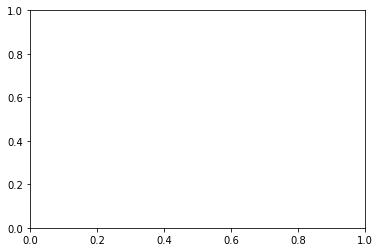

In [102]:
pyplot.spy(large, precision=0.0001)

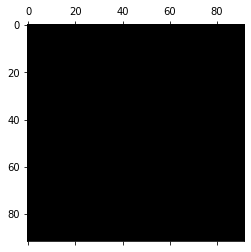

In [104]:
pyplot.spy(r)